# Capítulo 13

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import t

## Ejercicio 1

In [132]:
n1 = 25
n2 = 25
x1 = 82
sc1 = 384.16
x2 = 77
sc2 = 1536.64

error_estandar = np.sqrt(((sc1 + sc2)/(n1 + n2 - 2)) * ((1/n1) + (1/n2)))

print('Error estándar:', round(error_estandar,3))

Error estándar: 1.789


In [133]:
dif_m = x1 - x2
df = n1 + n2 - 2

t_obtenido = (dif_m - 0)/error_estandar
t_critico = t.ppf(0.995, df = df)
dif_critica = t_critico * error_estandar
p_valor = (1 - t.cdf(abs(t_obtenido), df = df))

print('t obtenido:', round(t_obtenido, 4))
print('t crítico 99% bilateral: ±', round(t_critico, 4) )
print('-' * 37)

print('Diferencia obtenida:', dif_m)
print('Diferencia crítica: ±', round(dif_critica,4))
print('-' * 37)

print('p_valor:', round(p_valor, 4))


t obtenido: 2.7945
t crítico 99% bilateral: ± 2.6822
-------------------------------------
Diferencia obtenida: 5
Diferencia crítica: ± 4.7991
-------------------------------------
p_valor: 0.0037


Otra forma de calcular la diferencia crítica

In [134]:
print('Diferencia crítica:', round(t.ppf(0.995, scale = error_estandar, df = df), 4))

Diferencia crítica: 4.7991


Rechazamos H0

## Ejercicio 2

In [135]:
suma_cuadrados_valores1 = 6516
n1 = 18
x1 = 324 / 18
sc1 = suma_cuadrados_valores1 - (324**2)/n1

suma_cuadrados_valores2 = 4352
n2 = 16
x2 = 256/16
sc2 = suma_cuadrados_valores2 - (256**2)/n2

dif_m = x1 - x2

error_estandar = np.sqrt((((sc1 + sc2)/(n1 + n2 - 2))*(1/n1 + 1/n2)))

t_obtenido = dif_m/error_estandar
t_critico = t.ppf(0.975, df = n1 + n2 - 2)
dif_critica = t_critico * error_estandar
p_valor = 2 * (1 - t.cdf(abs(t_obtenido), df = n1 + n2 - 2))

print('t obtenido:', round(t_obtenido, 4))
print('t crítico 95% bilateral: ±', round(t_critico, 4) )
print('-' * 37)

print('Diferencia obtenida:', dif_m)
print('Diferencia crítica: ±', round(dif_critica,4))
print('-' * 37)

print('p_valor:', round(p_valor, 4))

t obtenido: 1.074
t crítico 95% bilateral: ± 2.0369
-------------------------------------
Diferencia obtenida: 2.0
Diferencia crítica: ± 3.7932
-------------------------------------
p_valor: 0.2909


No se rechaza H0

## Ejercicio 3

In [136]:
grupo1 = [9, 6, 8, 8, 9]
grupo2 = [6, 7, 7, 9, 8]

test_t = stats.ttest_ind(grupo1, grupo2)
test_t

TtestResult(statistic=0.8017837257372727, pvalue=0.4458383415427517, df=8.0)

## Ejercicio 4

In [137]:
grupo1 = [6, 8, 14, 9, 10, 4, 7]
grupo2 = [4, 5, 3, 7, 4, 2, 1, 3]

test_t = stats.ttest_ind(grupo1, grupo2)
test_t

TtestResult(statistic=3.515514821907615, pvalue=0.003799337657370639, df=13.0)

Rechazamos H0

*Aclaración: el cálculo presentado anteriormente es más preciso que la respuesta del libro.*

In [138]:
varianza_grupo1 = statistics.variance(grupo1)
varianza_grupo2 = statistics.variance(grupo2)
F_obtenido = varianza_grupo1/varianza_grupo2

print('Varianza grupo 1:', round(varianza_grupo1,2))
print('Varianza grupo 2:', round(varianza_grupo2,2))
print('F obtenido:', round(F_obtenido, 4))

Varianza grupo 1: 10.24
Varianza grupo 2: 3.41
F obtenido: 3.0017


Calculamos los valores f críticos para un nivel de confianza del 99% con los grados de libertad corrspondientes

In [139]:
from scipy.stats import f

f_izq = f.ppf(0.005, len(grupo1) - 1, len(grupo2) - 1) # Los gl del numerador van primero
f_der = f.ppf(0.995, len(grupo1) - 1, len(grupo2) - 1)

print('Valor crítico menor:', round(f_izq,2))
print('Valor crítico mayor:', round(f_der,2))

Valor crítico menor: 0.09
Valor crítico mayor: 9.16


Dado que el F obtenido está comprendido entre esos valores, no rechazamos el supuesto de la homogeneidad de varianzas. 

## Ejercicio 5

Aquí cuidado porque la fórmula del error estándar cuando las varianzas poblacionales son conocidas es:

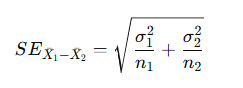

In [140]:
u1 = 80
desvp1 = 6
u2 = 77
desvp2 = 6

error_estandar = np.sqrt(desvp1**2/36 + desvp2**2/36)

dif = 80-77

z1 = (5 - dif)/error_estandar
z2 = (0 - dif)/error_estandar
z3 = (-5 - dif)/error_estandar

a = 1 - (stats.norm.cdf(5, loc = dif, scale = error_estandar))
b = 1 - (stats.norm.cdf(0, loc = dif, scale = error_estandar))
c = stats.norm.cdf(0, loc = dif, scale = error_estandar)
d = stats.norm.cdf(-5, loc = dif, scale = error_estandar)

print(f"""a)
z = {round(z1, 3)}
p = {round(a, 4)}
{'-' * 35}      
b)
z = {round(z2, 3)}
p = {round(b, 4)}
{'-' * 35}  
c)
z = {round(z2, 3)}
p = {round(c, 4)}
{'-' * 35}
d)
z = {round(z3, 3)}
p = {round(d, 4)}
      """)

a)
z = 1.414
p = 0.0786
-----------------------------------      
b)
z = -2.121
p = 0.9831
-----------------------------------  
c)
z = -2.121
p = 0.0169
-----------------------------------
d)
z = -5.657
p = 0.0
      


## Ejercicio 6

In [141]:
error_estandar1 = np.sqrt(desvp1**2/4 + desvp2**2/4)
error_estandar2 = np.sqrt(desvp1**2/9 + desvp2**2/9)
error_estandar3 = np.sqrt(desvp1**2/16 + desvp2**2/16)
error_estandar4 = np.sqrt(desvp1**2/25 + desvp2**2/25)

dif = 80-77

z1 = (0 - dif)/error_estandar1
z2 = (0 - dif)/error_estandar2
z3 = (0 - dif)/error_estandar3
z4 = (0 - dif)/error_estandar4

a = 1 - (stats.norm.cdf(0, loc = dif, scale = error_estandar1))
b = 1 - (stats.norm.cdf(0, loc = dif, scale = error_estandar2))
c = 1 - (stats.norm.cdf(0, loc = dif, scale = error_estandar3))
d = 1 - (stats.norm.cdf(0, loc = dif, scale = error_estandar4))

print(f"""a)
z = {round(z1, 3)}
p = {round(a, 4)}
Error estándar = {round(error_estandar1, 4)}
{'-' * 35}      
b)
z = {round(z2, 3)}
p = {round(b, 4)}
Error estándar = {round(error_estandar2, 4)}
{'-' * 35}  
c)
z = {round(z3, 3)}
p = {round(c, 4)}
Error estándar = {round(error_estandar3, 4)}
{'-' * 35}
d)
z = {round(z4, 3)}
p = {round(d, 4)}
Error estándar = {round(error_estandar4, 4)}
      """)

a)
z = -0.707
p = 0.7602
Error estándar = 4.2426
-----------------------------------      
b)
z = -1.061
p = 0.8556
Error estándar = 2.8284
-----------------------------------  
c)
z = -1.414
p = 0.9214
Error estándar = 2.1213
-----------------------------------
d)
z = -1.768
p = 0.9615
Error estándar = 1.6971
      


## Ejercicio 7

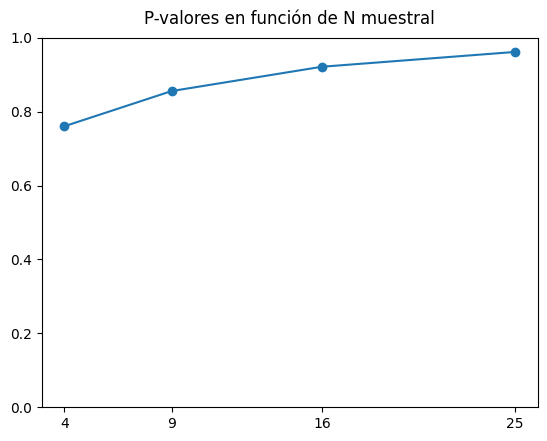

In [142]:
lista_n = [4, 9, 16, 25]
lista_pvalores = [a, b, c, d]

plt.plot(lista_n, lista_pvalores, marker = 'o')
plt.title('P-valores en función de N muestral', pad = 10, fontsize = 12)
plt.ylim(0, 1)
plt.xticks(lista_n)  # Ticks de 1 en 1
plt.show()

## Ejercicio 8

In [143]:
grupo1 = [12, 17, 15, 13, 11, 10, 14, 12]
grupo2 = [16, 14, 18 ,19 ,17 ,13 ,11 ,18]

test_t = stats.ttest_ind(grupo1, grupo2)
test_t

TtestResult(statistic=-2.1513752114743836, pvalue=0.049390322896360646, df=14.0)

In [144]:
t_critico = t.ppf(0.975, df = 14)
t_critico

2.1447866879169273

Se rechaza H0

## Ejercicio 9

In [145]:
analista_1 = [1.25, 2.50, 1.75, 2.25, 2.00, 1.75, 2.25, 1.00, 1.75, 2.00]
analista_2 = [1.25, 0.75, 1.00, 1.50, 2.00, 1.75, 0.05, 1.5, 0.25, 1.25]

test_t = stats.ttest_ind(analista_1, analista_2)
test_t

TtestResult(statistic=2.9269474999184277, pvalue=0.009005195160368903, df=18.0)

In [146]:
t_critico = t.ppf(0.975, df = 9)
t_critico

2.2621571627409915

Se rechaza H0. El analista 1 predijo mayores incrementos en los precios de las acciones. 

## Ejercicio 10

In [147]:
marca_a = [1, 2, 0, 3, 0, 2, 1, 4, 2, 3, 1, 2, 1, 1]
marca_x = [3, 1, 2, 4, 1, 5, 2, 0, 5, 6, 3, 2, 4, 3]

test_t = stats.ttest_ind(marca_a, marca_x)
test_t

TtestResult(statistic=-2.3149035889112524, pvalue=0.02877506102767482, df=26.0)

Rechazamos H0. El número de caries del niños que emplean la marca A tienen menos caries que los niños que usan el dentrífico de la marca X. El t es negativo porque el cálculo es: media de marca A - media de marca X.

## Ejercicio 11

### Parte A

In [148]:
v_suma = 10371
vc_suma = 198503
n1 = 582
sc1 = vc_suma - (v_suma**2/n1)
media1 = v_suma/n1
print('Media varones:', round(media1,2))
print('Suma de cuadrados 1:', round(sc1, 2))


m_suma = 20609
mc_suma = 427764
n2 = 1052
sc2 = mc_suma - ((m_suma**2)/n2)
media2 = m_suma/n2
print('Media mujeres:', round(media2,2))
print('Suma de cuadrados 2:', round(sc2, 2))

df = n1 + n2 - 2

error_estandar = np.sqrt(((sc1 + sc2)/ df) *(1/n1 + 1/n2))

diferencia = media1 - media2
print('Diferencia de medias:', round(diferencia,2))

t_obtenido = diferencia/error_estandar
print('t obtenido:', round(t_obtenido,3))

t_critico = t.ppf(0.975, df = df)
print('t crítico: ±', round(t_critico,3))

Media varones: 17.82
Suma de cuadrados 1: 13696.06
Media mujeres: 19.59
Suma de cuadrados 2: 24027.42
Diferencia de medias: -1.77
t obtenido: -7.129
t crítico: ± 1.961


*Aclaración: el t obtenido es más preciso que el expuesto en el libro. Esto sucede porque no redondeamos el error estándar. Pueden probar redondéandolo a dos decimales, verán que se aproxima al t obtenido del libro.*

In [149]:
w_cuadrado = (t_obtenido**2 - 1)/(t_obtenido**2 + df)
print('Omega cuadrado:', round(w_cuadrado,4))

Omega cuadrado: 0.0296


Aun cuando el test t nos da soporte para rechazar H0, indicando que las mujeres tienen resultados significativamente más altos que los hombres, esto se debe más al tamaño de la muestra que a otra cosa. Esto lo vemos al observar que (omega**2) es muy bajo: solo el 2,9% de la variabilidad en la escala de generosidad se debe a la variabilidad entre los grupos de género. 

### Otra forma de realizar el test t

Otra forma de realizar el test t es con una función que permite hacerlo sin tener los datos originales (para dos muestras, pero **no** para una sola).

In [150]:
v_suma = 10371
vc_suma = 198503
n1 = 582
sc1 = vc_suma - (v_suma**2/n1)
media1 = v_suma/n1
desv1 = np.sqrt(sc1/(n1-1))

m_suma = 20609
mc_suma = 427764
n2 = 1052
sc2 = mc_suma - ((m_suma**2)/n2)
media2 = m_suma/n2
desv2 = np.sqrt(sc2/(n2-1))

test_t = stats.ttest_ind_from_stats(media1, desv1, n1, media2, desv2, n2)
test_t

Ttest_indResult(statistic=-7.129295211953856, pvalue=1.5093998718438335e-12)

### Parte B

In [151]:
v_suma = 1024
vc_suma = 2712
n1 = 582
sc1 = vc_suma - (v_suma**2/n1)
media1 = v_suma/n1
desv1 = np.sqrt(sc1/(n1-1))
print('Media varones:', round(media1,2))
print('Suma de cuadrados 1:', round(sc1, 2))

m_suma = 1694
mc_suma = 4318
n2 = 1052
sc2 = mc_suma - ((m_suma**2)/n2)
media2 = m_suma/n2
desv2 = np.sqrt(sc2/(n2-1))
print('Media mujeres:', round(media2,2))
print('Suma de cuadrados 2:', round(sc2, 2))

test_t = stats.ttest_ind_from_stats(media1, desv1, n1, media2, desv2, n2)
test_t

Media varones: 1.76
Suma de cuadrados 1: 910.32
Media mujeres: 1.61
Suma de cuadrados 2: 1590.21


Ttest_indResult(statistic=2.3329717224119793, pvalue=0.019770601315547)

In [152]:
t_obtenido = test_t[0]

w_cuadrado = (t_obtenido**2 - 1)/(t_obtenido**2 + n1 + n2 - 1)
print('Omega cuadrado:', round(w_cuadrado,4))

Omega cuadrado: 0.0027


Misma situación que el anterior ejercicio. 

## Ejercicio 13

In [153]:
n1 = 15
media1 = 24.63
desv1 = 3.53

n2 = 15
media2 = 21.45
desv2 = 4.02

test_t = stats.ttest_ind_from_stats(media1, desv1, n1, media2, desv2, n2)
test_t

Ttest_indResult(statistic=2.3021206028776766, pvalue=0.02897592033499049)

Hipótesis nula: las medias de los grupos son iguales.

Se rechaza H0, hay una diferencia significativa en el rendimiento laboral promedio entre el grupo adiestrado y el grupo de control. Esto respalda la afirmación del director de adiestramiento.

## Ejercicio 16

a) Falso.

b) Verdadero.

c) Falso.


## Ejercicio 17

Las diferencias de medias las calculamos en el archivo de Excel llamado *cap13_ej17.xlsx*.

In [154]:
diferencia_medias = pd.Series([1, 2, 3, 3, 4, 5,
                    0, 1, 2, 2, 3, 4,
                    -1, 0, 1, 1, 2, 3,
                    -1, 0, 1, 1, 2, 3,
                    -2, -1, 0, 0, 1, 2,
                    -3, -2, -1, -1, 0, 1])

bins = np.arange(min(diferencia_medias) - 0.5, max(diferencia_medias) + 1, 1)
print(list(bins))
# Recordar que np.arrange() genera un rango que excluye el último valor: [start, stop)


[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


In [155]:
set(diferencia_medias)

{-3, -2, -1, 0, 1, 2, 3, 4, 5}

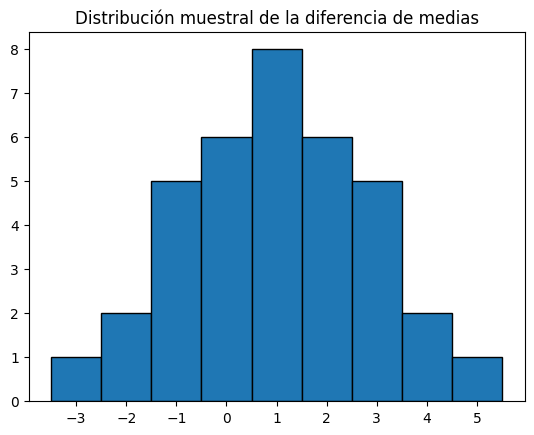

In [156]:
plt.hist(diferencia_medias, bins= bins, edgecolor='black')

plt.title('Distribución muestral de la diferencia de medias')
plt.xticks(list(set(diferencia_medias)))
plt.show()

*Set()* crea un conjunto de valores únicos, elimina los repetidos. Pero para que Pandas lo lea, necesita ser convertido a lista.

### Otra forma de resolverlo es con *itertools*

Distribución de medias P1: [3.0, 4.0, 5.0, 5.0, 6.0, 7.0]
Distribución de medias P2: [2.0, 3.0, 4.0, 4.0, 5.0, 6.0]
Distribución de diferencias de medias: [1.0, 0.0, -1.0, -1.0, -2.0, -3.0, 2.0, 1.0, 0.0, 0.0, -1.0, -2.0, 3.0, 2.0, 1.0, 1.0, 0.0, -1.0, 3.0, 2.0, 1.0, 1.0, 0.0, -1.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, 5.0, 4.0, 3.0, 3.0, 2.0, 1.0]


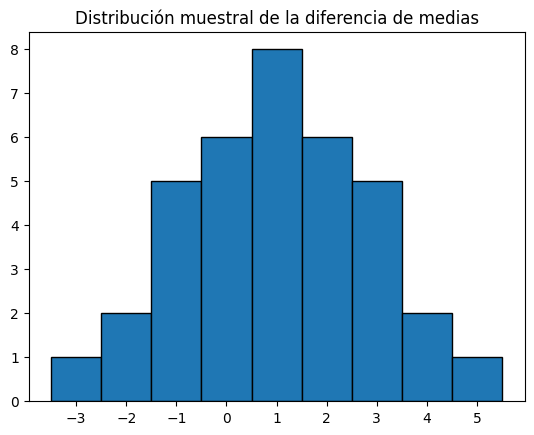

In [157]:
import itertools

# Datos de las poblaciones
poblacion1 = [2, 4, 6, 8]
poblacion2 = [1, 3, 5, 7]

# Generar todas las combinaciones posibles de tamaño 2 sin reposición para ambas poblaciones
muestras1 = list(itertools.combinations(poblacion1, 2))
muestras2 = list(itertools.combinations(poblacion2, 2))

# Calcular las medias muestrales
medias1 = [np.mean(muestra) for muestra in muestras1]
medias2 = [np.mean(muestra) for muestra in muestras2]

print('Distribución de medias P1:', medias1)
print('Distribución de medias P2:', medias2)

# Calcular todas las diferencias posibles entre las medias muestrales
diferencias = []
for m1 in medias1:
    for m2 in medias2:
        d = m1 - m2
        diferencias.append(d)
print('Distribución de diferencias de medias:', diferencias)

# Crear el histograma
plt.hist(diferencias, bins= bins, edgecolor='black')
plt.title('Distribución muestral de la diferencia de medias')
plt.xticks(list(set(diferencias)))
plt.show()

### Funciones de combinatoria de *itertools*

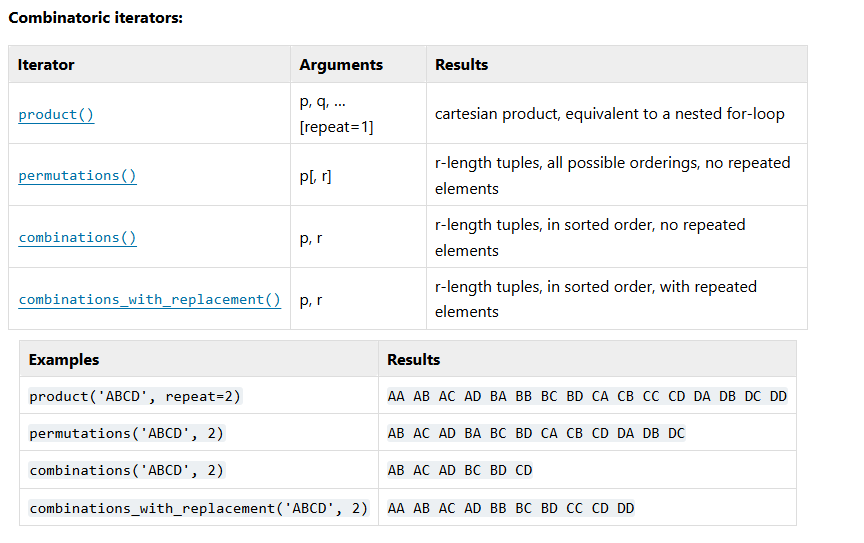

## Ejercicio 18

In [158]:
distribucion_muestral = pd.Series(diferencias).value_counts().sort_index()
distribucion_muestral

-3.0    1
-2.0    2
-1.0    5
 0.0    6
 1.0    8
 2.0    6
 3.0    5
 4.0    2
 5.0    1
dtype: int64

In [159]:
a = (6 + 8 + 6 + 5 + 2 + 1)/sum(distribucion_muestral.values)
b = (8 + 6 + 5 + 2 + 1)/sum(distribucion_muestral.values)
c = (1 + 2 + 5 + 6)/sum(distribucion_muestral.values)
d = (1 + 2 + 5)/sum(distribucion_muestral.values)
e = (2 + 1)/sum(distribucion_muestral.values)
f = 0/sum(distribucion_muestral.values)
g = (6 + 5  + 2 + 1)/sum(distribucion_muestral.values) + (1 + 2)/sum(distribucion_muestral.values)

print('a):', round(a, 4))
print('b):', round(b, 4))
print('c):', round(c, 4))
print('d):', round(d, 4))
print('e):', round(e, 4))
print('f):', round(f, 4))
print('g):', round(g, 4))

a): 0.7778
b): 0.6111
c): 0.3889
d): 0.2222
e): 0.0833
f): 0.0
g): 0.4722


## Ejercicio 19

In [160]:
p_media1 = np.mean(poblacion1)
p_media2 = np.mean(poblacion2)

var1 = statistics.pvariance(poblacion1)
var2 = statistics.pvariance(poblacion2)

desv1 = statistics.pstdev(poblacion1)
desv2 = statistics.pstdev(poblacion2)

print('Media de la población 1:', round(p_media1, 2))
print('Varianza de la población 1:', var1)
print('Desvío estándar de la población 1:', round(desv1, 3))
print('-'*40)
print('Media de la población 2:', round(p_media2, 2))
print('Varianza de la población 2:', var2)
print('Desvío estándar de la población 2:', round(desv2, 3))

Media de la población 1: 5.0
Varianza de la población 1: 5
Desvío estándar de la población 1: 2.236
----------------------------------------
Media de la población 2: 4.0
Varianza de la población 2: 5
Desvío estándar de la población 2: 2.236


## Ejercicio 20

En este caso se trabaja con los valores ya redondeados para evitar disparidades fuertes entre los resultados expuestos aquí y en el libro. 

In [161]:
error_estandar = round(np.sqrt(var1/25 + var2/25), 2)
diferencia_medias = p_media1 - p_media2


z1 = round((0 - diferencia_medias)/error_estandar,2)
z2 = round((1 - diferencia_medias)/error_estandar, 2) 
z3 = round((0 - diferencia_medias)/error_estandar, 2)
z4 = round((-1 - diferencia_medias)/error_estandar, 2)
z5 = round((4 - diferencia_medias)/error_estandar, 2)
z7a = round((2 - diferencia_medias)/error_estandar, 2)
z7b = round((-2 - diferencia_medias)/error_estandar, 2)

a = 1 - stats.norm.cdf(z1)
b = 1 - stats.norm.cdf(z2)
c = stats.norm.cdf(z3)
d = stats.norm.cdf(z4)
e = 1 - stats.norm.cdf(z5)
f = b + d
g = (1 - stats.norm.cdf(z7a)) - stats.norm.cdf(z7b)

print('a) z:', round(z1, 3), 'p-valor:', round(a, 4))
print('b) z:', round(z2, 3), 'p-valor:', round(b, 4))
print('c) z:', round(z3, 3), 'p-valor:', round(c, 4))
print('d) z:', round(z4, 3), 'p-valor:', round(d, 4))
print('e) z:', round(z5, 10), 'p-valor:', round(e, 4))
print('f)', 'p-valor:', round(f, 4))
print('g) z1:', round(z7a, 3), 'z2:', round(z7b, 3), 'p-valor:', round(g, 4))

a) z: -1.59 p-valor: 0.9441
b) z: 0.0 p-valor: 0.5
c) z: -1.59 p-valor: 0.0559
d) z: -3.17 p-valor: 0.0008
e) z: 4.76 p-valor: 0.0
f) p-valor: 0.5008
g) z1: 1.59 z2: -4.76 p-valor: 0.0559


## Ejercicio 21

In [162]:
error_estandar1 = round(np.sqrt(var1/4 + var2/4), 2)
error_estandar2 = round(np.sqrt(var1/9 + var2/9), 2)
error_estandar3 = round(np.sqrt(var1/16 + var2/16), 2)
error_estandar4 = round(np.sqrt(var1/36 + var2/36), 2)

z1 = round((0 - diferencia_medias)/error_estandar1, 2)
z2 = round((0 - diferencia_medias)/error_estandar2, 2)
z3 = round((0 - diferencia_medias)/error_estandar3, 2)
z4 = (0 - diferencia_medias)/error_estandar4

p1 = round(stats.norm.cdf(z1), 4)
p2 = round(stats.norm.cdf(z2), 4)
p3 = round(stats.norm.cdf(z3), 4)
p4 = round(stats.norm.cdf(z4), 4)

print('a) z:', z1, 'p-valor:', p1)
print('a) z:', z2, 'p-valor:', p2)
print('a) z:', z3, 'p-valor:', p3)
print('a) z:', round(z4, 2), 'p-valor:', p4)

a) z: -0.63 p-valor: 0.2643
a) z: -0.95 p-valor: 0.1711
a) z: -1.27 p-valor: 0.102
a) z: -1.89 p-valor: 0.0296


## Ejercicio 25

In [163]:
grupo1 = [5, 6, 7, 4, 8, 9, 6, 5, 7, 6]
grupo2 = [2, 3, 4, 3, 4, 4, 3, 1, 5, 4]

test_t = stats.ttest_ind(grupo1, grupo2)
test_t

TtestResult(statistic=5.015503913178175, pvalue=8.977892871866601e-05, df=18.0)

Rechazamos H0. Contamos con evidencia para afirmar que los descansos reducen el número de errores. 

## Ejercicio 26

In [164]:
from scipy.stats import f

F_obtenido = statistics.variance(grupo1)/statistics.variance(grupo2)

f_izq = f.ppf(0.025, len(grupo1) - 1, len(grupo2) - 1) # Los gl del numerador van primero
f_der = f.ppf(0.975, len(grupo1) - 1, len(grupo2) - 1)

print('F obtenido:', round(F_obtenido, 3))
print('Valor crítico menor:', round(f_izq,3))
print('Valor crítico mayor:', round(f_der,3))


F obtenido: 1.661
Valor crítico menor: 0.248
Valor crítico mayor: 4.026


No podemos rechazar la hipótesis nula de que las varianzas son iguales.

## Ejercicio 27

In [165]:
banco_a = [4, 8, 3, 0, 3, 5, 3, 4, 0, 5, 2, 4, 6, 2, 0]
banco_b = [2, 0, 1, 2, 1, 1, 3, 3, 4, 3, 1, 4, 0, 5, 0]

t_test = stats.ttest_ind(banco_a, banco_b)
t_test

TtestResult(statistic=1.75869930795857, pvalue=0.08955500943378526, df=28.0)

## Ejercicio 29

In [166]:
marca_a = [19, 20, 20, 21, 18, 20, 19, 21, 23, 17]
marca_b = [26, 24, 25, 23, 25, 24, 22, 26, 27, 25]

test_t = stats.ttest_ind(marca_a, marca_b)
test_t

TtestResult(statistic=-6.876369964957321, pvalue=1.97035499171554e-06, df=18.0)

Sí, hay una diferencia significativa entre el número de latas vendidas.

## Ejercicio 30

In [167]:
from scipy.stats import f

varianza1 = statistics.variance(marca_a)
varianza2 = statistics.variance(marca_b)

f_obtenido1 = varianza1/varianza2

f_critico = f.ppf(0.975, dfn = len(marca_a)-1, dfd = len(marca_b)-1)

print("F obtenido:", round(f_obtenido1, 2))
print("F crítico:", round(f_critico, 2))

F obtenido: 1.27
F crítico: 4.03


Comprobemos qué pasaba si en lugar de dividir la varianza de la marca A sobre la de B, hacíamos al revés.

En este caso, como la varianza de B es más pequeña, tenemos que comparar el resultado con la cola izquierda.

In [168]:
from scipy.stats import f

varianza1 = statistics.variance(marca_a)
varianza2 = statistics.variance(marca_b)

f_obtenido2 = varianza2/varianza1

f_critico = f.ppf(0.025, dfn = len(marca_a)-1, dfd = len(marca_b)-1)

print("F obtenido:", round(f_obtenido2, 3))
print("F crítico:", round(f_critico, 3))

F obtenido: 0.785
F crítico: 0.248


El p-valor no puede calcularse como lo veníamos haciendo porque la curva no es simétrica

In [169]:
# Área a la derecha del f obtenido
p_valor_der = 1 - f.cdf(f_obtenido1, dfn = len(marca_a)-1, dfd = len(marca_b)-1)

# Área a la izquierda del f obtenido
p_valor_izq = f.cdf(f_obtenido2, dfn = len(marca_a)-1, dfd = len(marca_b)-1)

# Sumamos las áreas (probabilidades de error tipo I)
print(round(p_valor_der + p_valor_izq, 4))

0.7245


No rechazamos el supuesto de homogeneidad de varianzas.

## Ejercicio 32

In [170]:
heterosexuales = [05.9, -22.4, 19.2, 39, 23.1]
homosexuales = [11.2, -38, 18.1, -05.6, 21.5]

test_t = stats.ttest_ind(heterosexuales, homosexuales)
test_t

TtestResult(statistic=0.7679740599809537, pvalue=0.464565020097226, df=8.0)

No se rechaza H0